# Maschinelles Lernen
# Aufgabenblatt 04 - Aufgabe 03
# Prof. Dr. David Spieler

In [1]:
import csv
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plot
import numpy as np

matplotlib.rcParams['figure.figsize'] = (14, 12)

In [3]:
def load_data(filename):
    """
    load a 2-d dataset with labels from a csv file in the format y,x1,x2
    and outputs three numpy arrays for the x1, x2, and y values where the labels
    have been converted to {0.0, 1.0}
    """
    with open(filename, 'r') as csvfile:
        pointreader = csv.reader(csvfile, delimiter=',')
        x1 = []
        x2 = []
        y = []
        for row in pointreader:
            x1.append(float(row[1]))
            x2.append(float(row[2]))
            y.append(0.0 if float(row[0]) == -1.0 else 1.0)
    return np.array(x1), np.array(x2), np.array(y)

# load linearly seperable dataset https://github.com/cuekoo/Binary-classification-dataset
x1, x2, y = load_data('data/linsep.csv')

# shuffle data to prevent unwanted effects during learning
s = np.arange(x1.shape[0])
np.random.shuffle(s)
x1 = x1[s]
x2 = x2[s]
y = y[s]

# Überblick

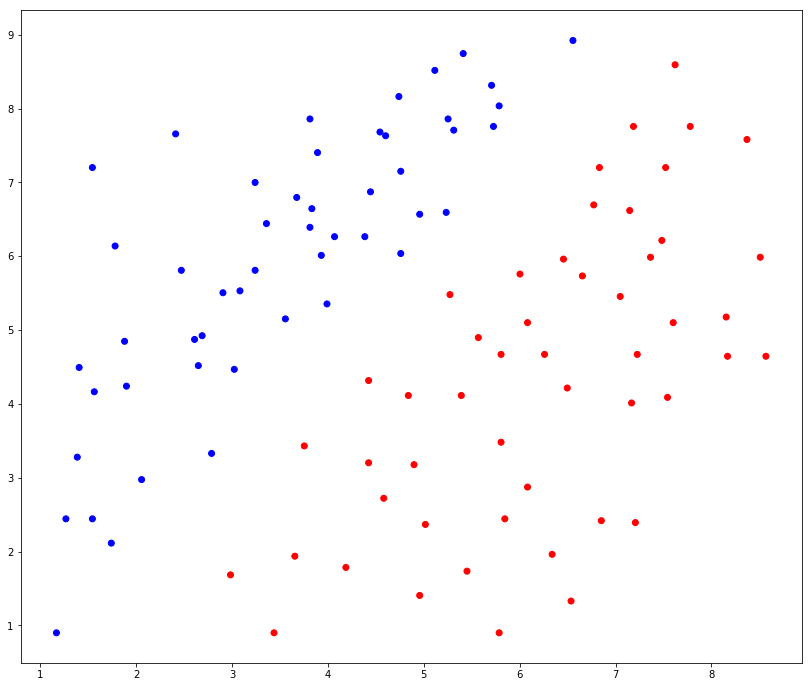

In [4]:
plot.scatter(x1, x2, c=y, cmap=matplotlib.colors.ListedColormap(['red', 'blue']))

# Aufgabe 3.2
Der Datensatz ist linear trennbar.

# Implementierung

In [11]:
def perceptron_classify(x1, x2, w):
    """
    classify a 2-d data point [x1,x2]^T via the weights w=[w0,w1,w2]^T
    """
    t = w[0] + x1 * w[1] + x2 * w[2]
    return 1.0 if t > 0.0 else 0.0
    
def perceptron_visualize(x1, x2, y, w):
    """
    scatter plot the data points and add a plot of the decision surface
    """
    plot.figure()
    plot.scatter(x1, x2, c=y, cmap=matplotlib.colors.ListedColormap(['red', 'blue']))
    plot.plot([x1.min(), x1.max()], [-(w[0] + w[1] * x1.min()) / w[2] , -(w[0] + w[1] * x1.max()) / w[2]])
    
def perceptron_learn_step(x1, x2, y, w):
    """
    perform a full perceptron learning step over all data points [x1_i,x2_i]^T 
    with labels y_i, update the weights w accordingly and return the new weights
    """
    wp = w[:]
    for x1_i, x2_i, y_i in zip(x1, x2, y):
        prediction = perceptron_classify(x1_i, x2_i, w)
        
        correction = y_i - prediction
        
        wp[0] = wp[0] + correction * 1.0
        wp[1] = wp[1] + correction * x1_i
        wp[2] = wp[2] + correction * x2_i
        
    return wp

def perceptron_accuracy(x1, x2, y, w):
    """
    compute the accuracy when applying the perceptron with weights w to all 
    data points [x1_i,x2_i]^T with labels y_i
    """ 
    correct = 0.0
    for x1_i, x2_i, y in zip(x1, x2, y):
        if perceptron_classify(x1_i, x2_i, w) == y:
            correct = correct + 1.0
    return correct / len(x1)

def perceptron_learn(x1, x2, y, gamma):
    """
    implementation of the perceptron learning algorithm on data points 
    [x1_i,x2_i]^T with labels y_i with accuracy threshold gamma and visualization
    every 10 iterations
    """
    rho = 0
    w = [0.0, 0.0, 0.0]
    iteration = 0
    while (rho < gamma):
        w = perceptron_learn_step(x1, x2, y, w)
        rho = perceptron_accuracy(x1, x2, y, w)
        print("iteration=", iteration, "accuracy =", rho)
        if iteration % 10 == 0:
            perceptron_visualize(x1, x2, y, w)
        iteration += 1
    return w

# Training

iteration= 0 accuracy = 0.5
iteration= 1 accuracy = 0.75
iteration= 2 accuracy = 0.5
iteration= 3 accuracy = 0.5
iteration= 4 accuracy = 0.62
iteration= 5 accuracy = 0.51
iteration= 6 accuracy = 0.65
iteration= 7 accuracy = 0.61
iteration= 8 accuracy = 0.72
iteration= 9 accuracy = 0.79
iteration= 10 accuracy = 0.87
iteration= 11 accuracy = 0.95
iteration= 12 accuracy = 0.98
iteration= 13 accuracy = 0.99
iteration= 14 accuracy = 0.99
iteration= 15 accuracy = 0.99
iteration= 16 accuracy = 0.99
iteration= 17 accuracy = 0.99
iteration= 18 accuracy = 0.99
iteration= 19 accuracy = 0.99
iteration= 20 accuracy = 0.99
iteration= 21 accuracy = 0.99
iteration= 22 accuracy = 0.99
iteration= 23 accuracy = 0.98
iteration= 24 accuracy = 0.99
iteration= 25 accuracy = 0.99
iteration= 26 accuracy = 0.99
iteration= 27 accuracy = 0.99
iteration= 28 accuracy = 0.99
iteration= 29 accuracy = 0.99
iteration= 30 accuracy = 0.99
iteration= 31 accuracy = 0.98
iteration= 32 accuracy = 0.99
iteration= 33 accuracy 

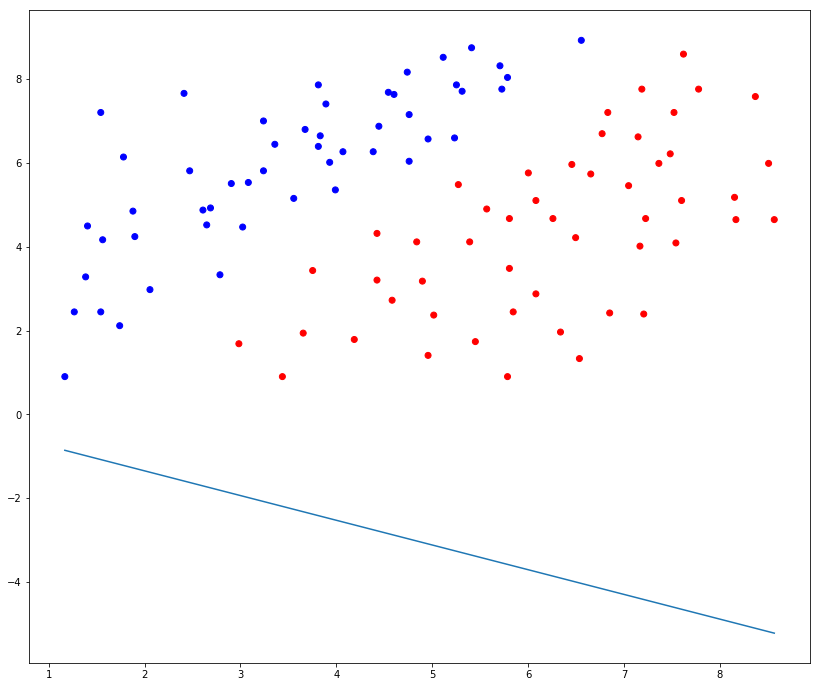

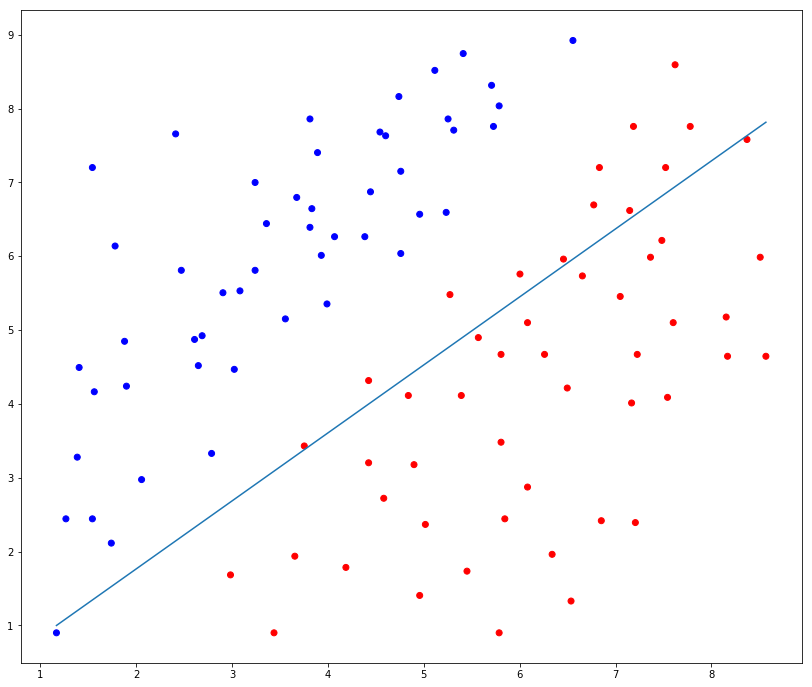

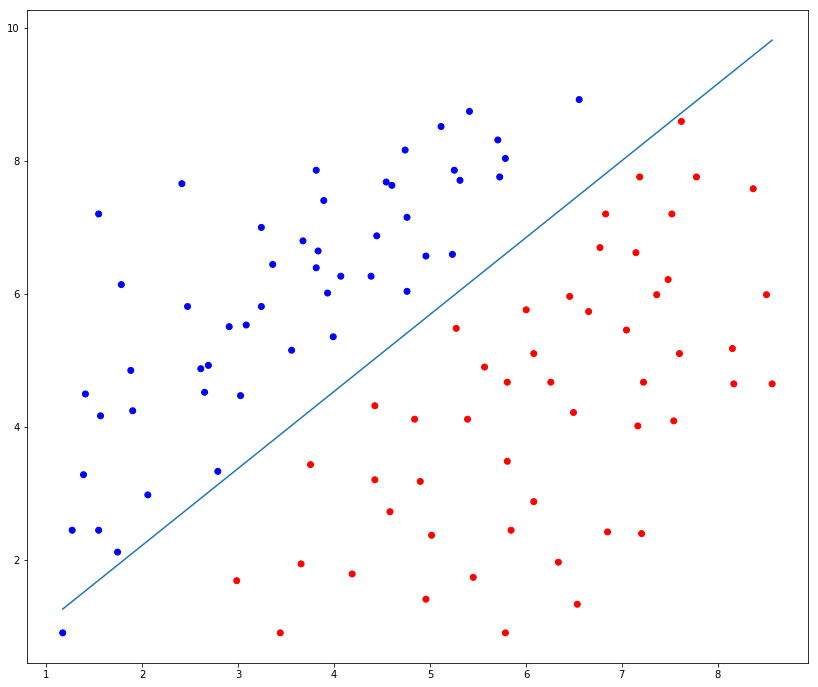

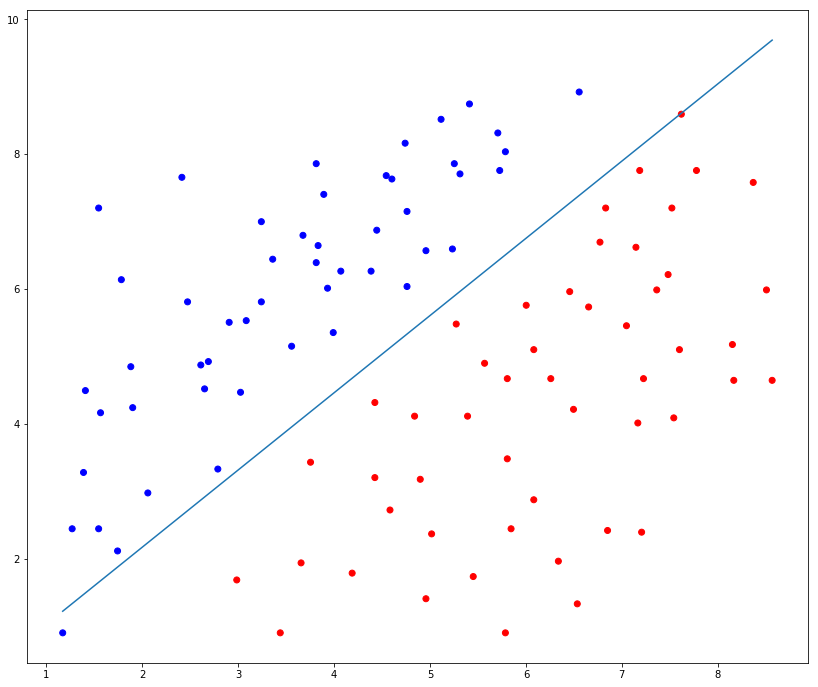

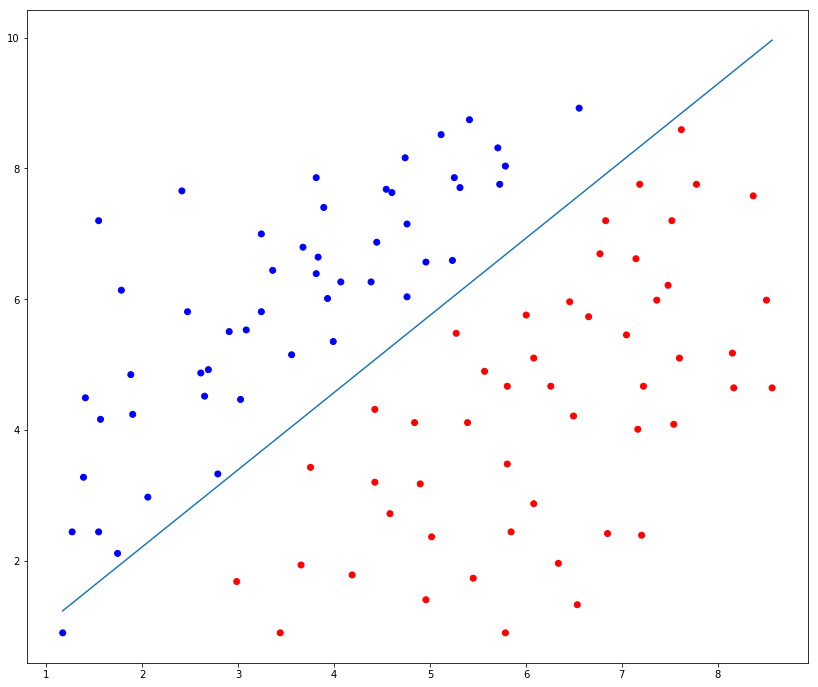

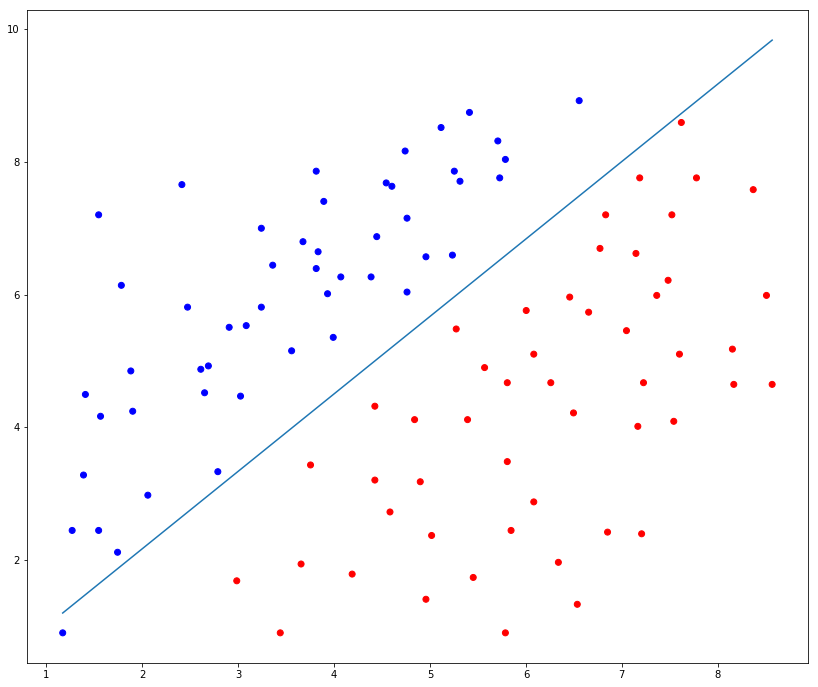

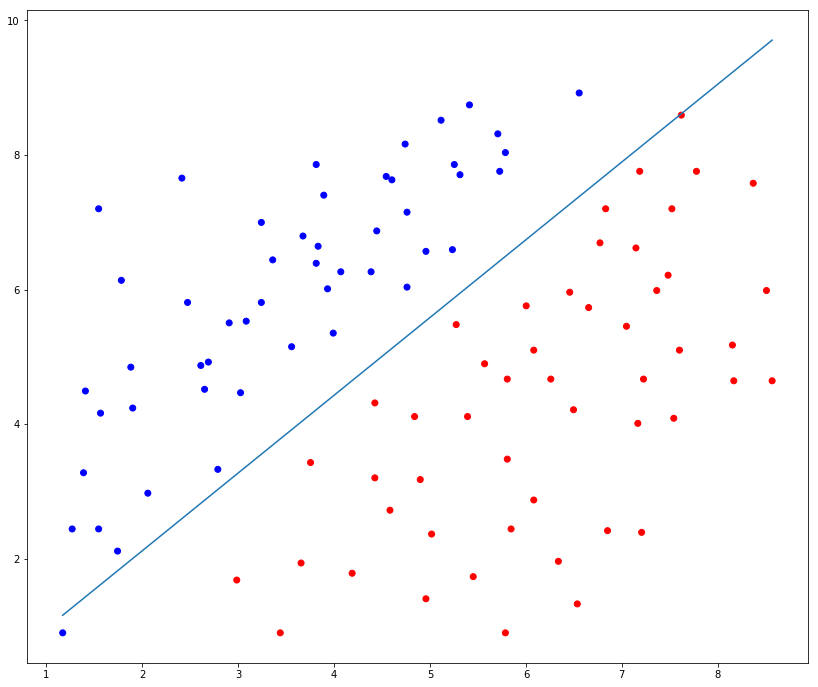

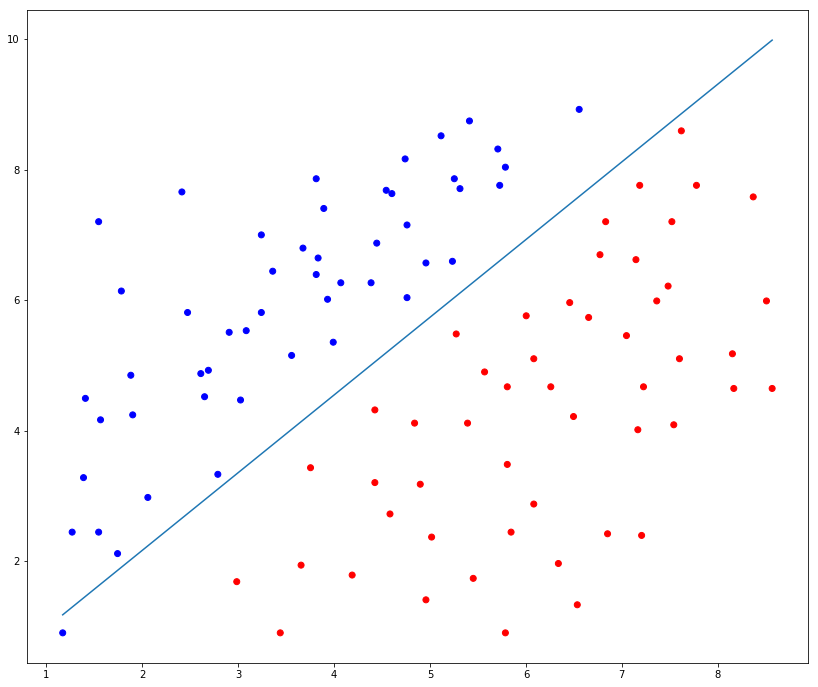

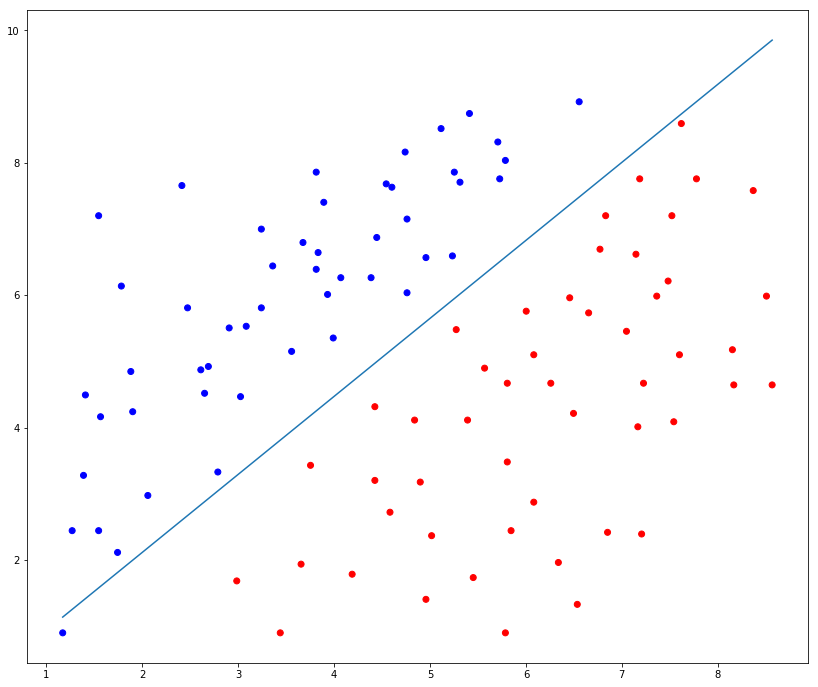

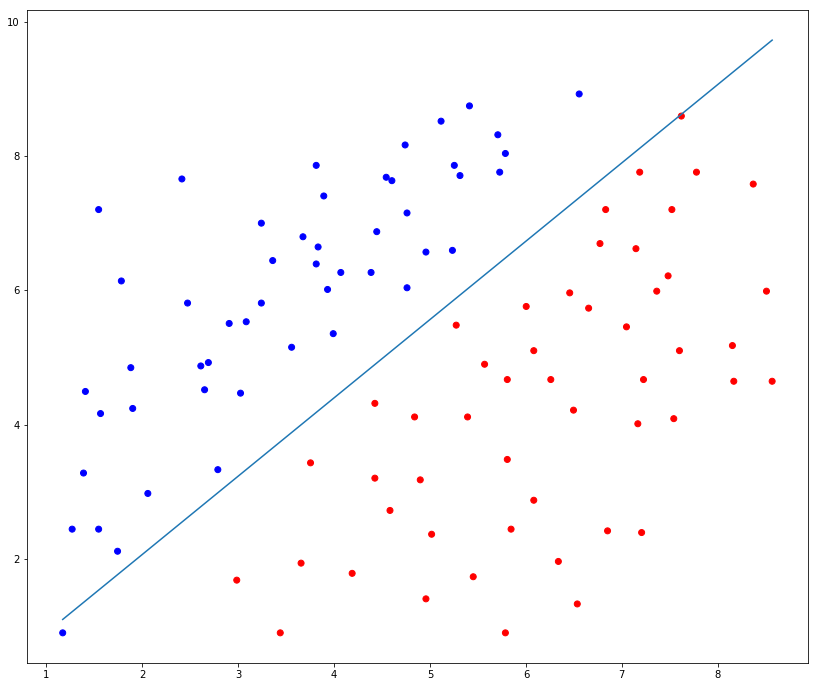

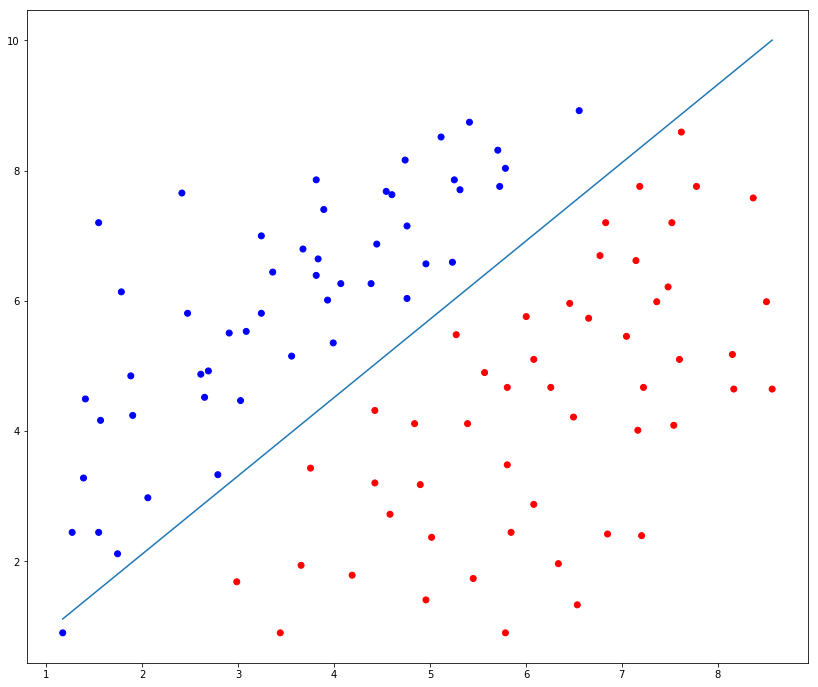

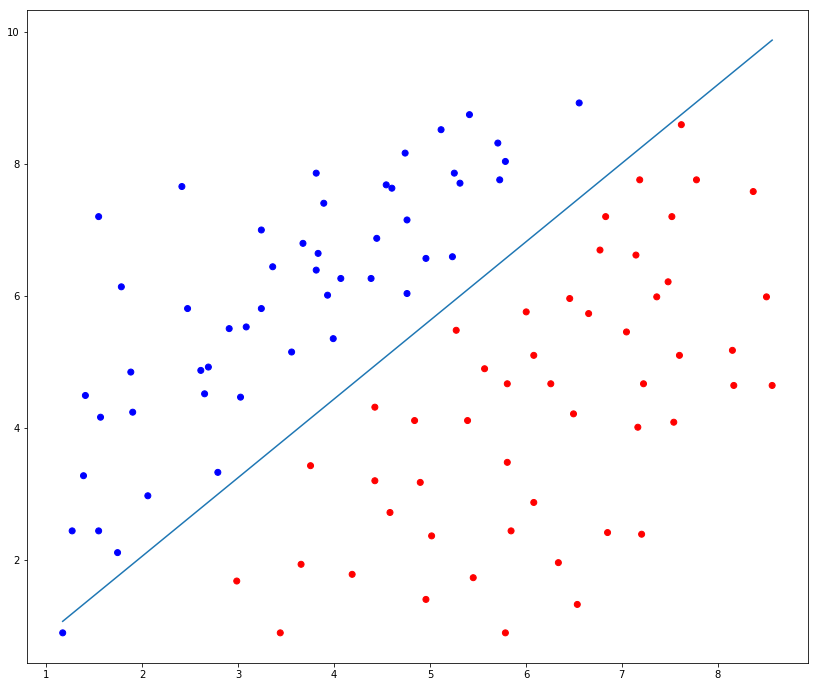

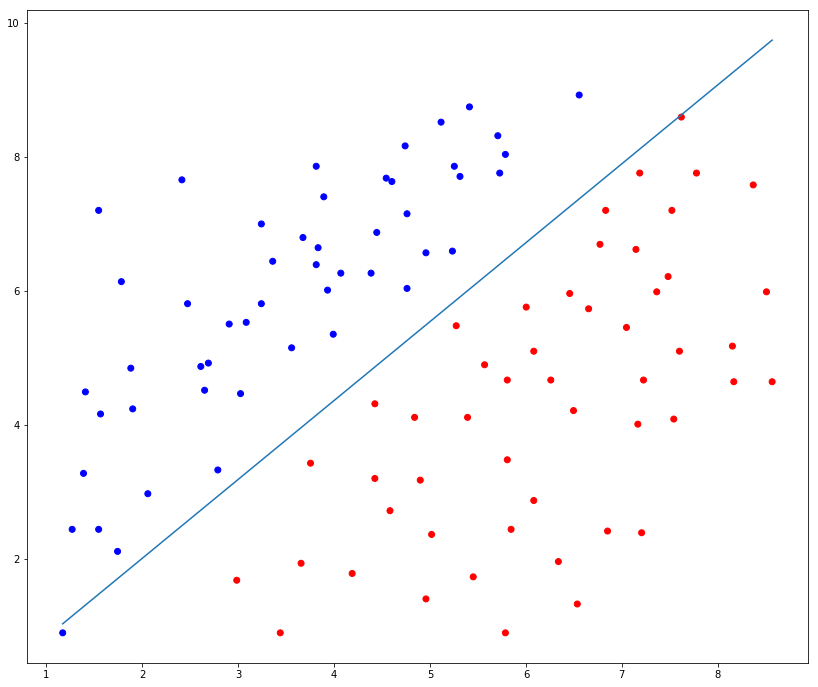

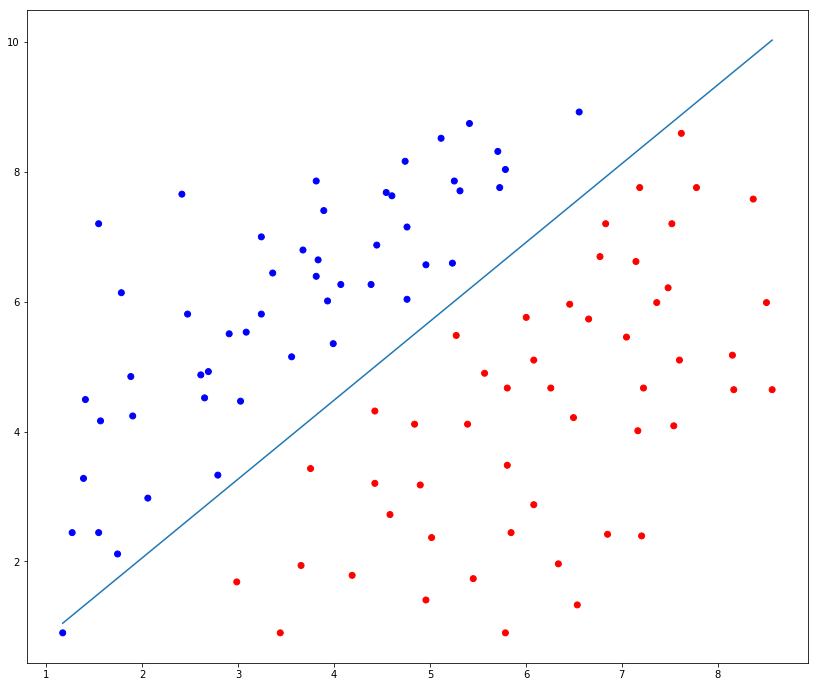

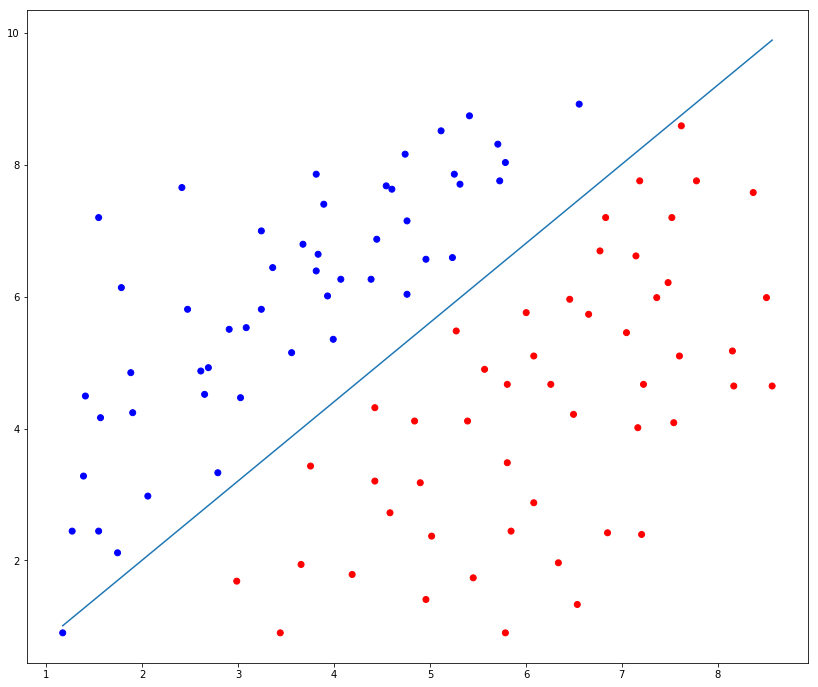

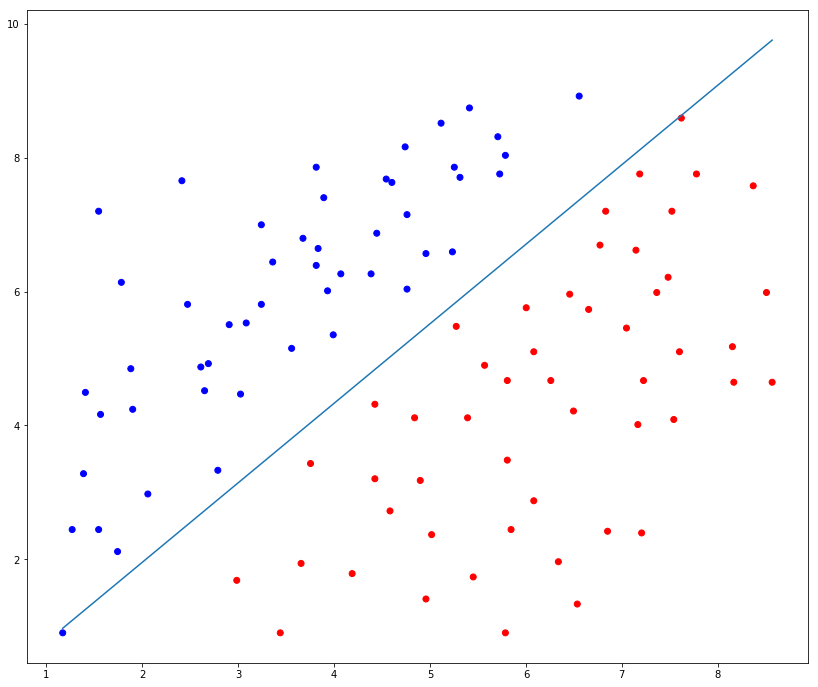

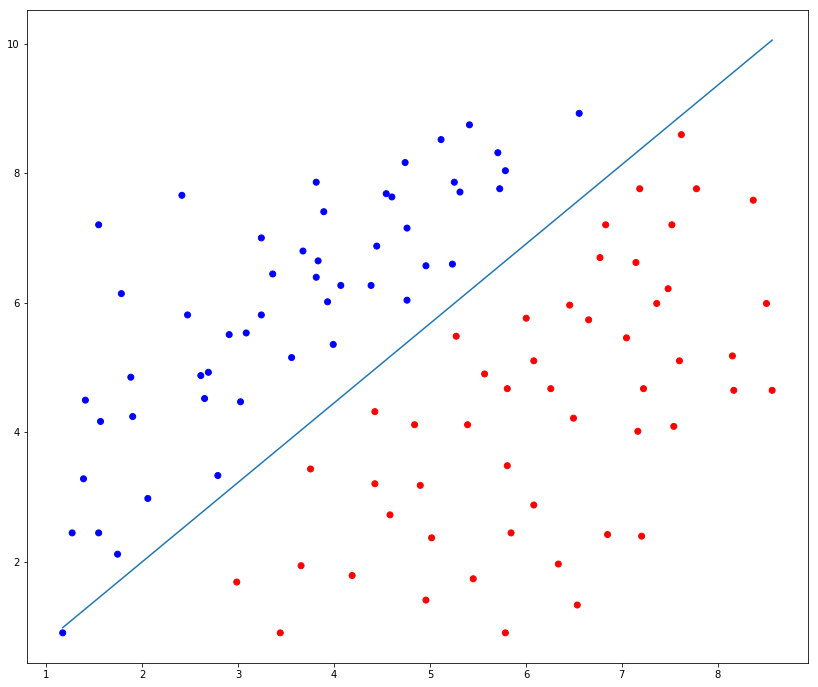

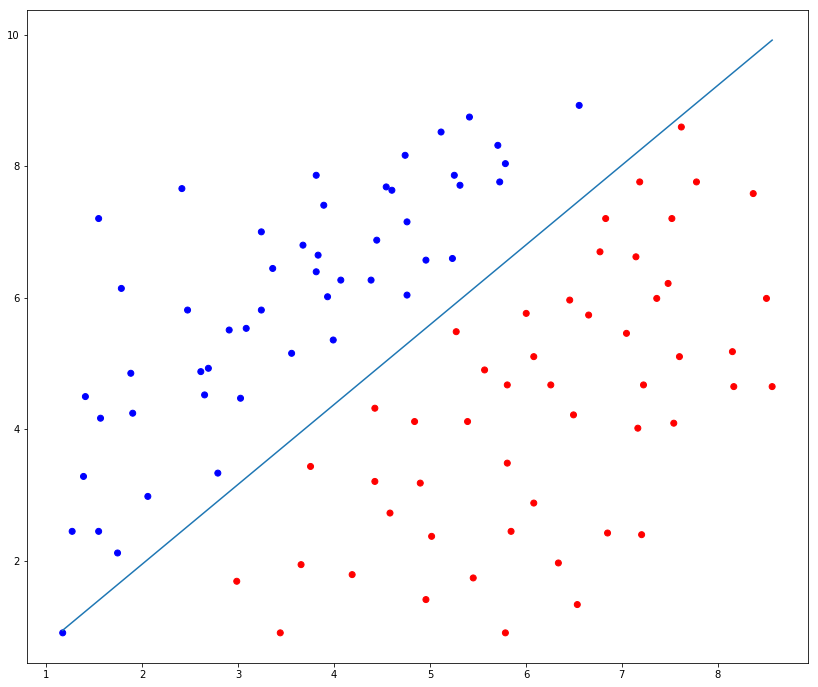

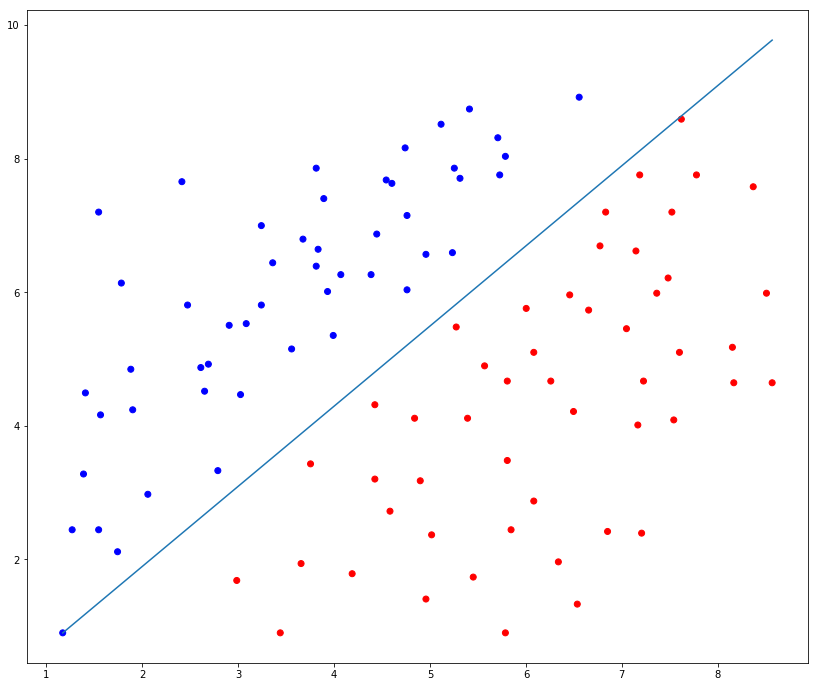

In [12]:
w = perceptron_learn(x1, x2, y, 1.0)

In [8]:
w

[175.0, -417.18390000000386, 347.69630000000177]

# Aufgabe 3.4
- Es wurden 180 Iterationen benötigt, um eine 100%-ige Genauigkeit zu erreichen 
.- Die finalen Gewichte sind $\mathbf{w}_0=175$, $\mathbf{w}_1=-417.174$ und $\mathbf{w}_2=347.6963$